# 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [0]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from keras.preprocessing.image import random_rotation, random_shift, random_zoom
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Activation, Dense, Dropout, Flatten
from keras.models import Model, Sequential, model_from_json
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import np_utils

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [6]:
pwd

'/content/drive/My Drive/Colab Notebooks'

In [36]:
train_dir = '/content/drive/My Drive/data_set'
val_dir = '/content/drive/My Drive/data_set'
train_folder = os.listdir(train_dir)
print(train_folder)

dog_folder = '/content/drive/My Drive/data_set/dog'
cat_folder = '/content/drive/My Drive/data_set/cat'
dog_imgs = os.listdir(dog_folder)
cat_imgs = os.listdir(cat_folder)
print("Number of dog images:", len(dog_imgs))
print("Number of cat images:", len(cat_imgs))

n_train_imgs = len(dog_imgs + cat_imgs)
print("Number of train images:", n_train_imgs)

['.DS_Store', 'cat', 'dog']
Number of dog images: 12
Number of cat images: 12
Number of train images: 24


# 【問題2】分類データセットに対するデータ拡張

In [0]:
# ImageDataGenerator
datagen = ImageDataGenerator(
            #featurewise_center = False,
            #samplewise_center = False,
            #featurewise_std_normalization = False,
            #samplewise_std_normalization = False,
            #zca_whitening = False,
            rotation_range = 20, # ランダムに回転
            #vertical_flip = True, # ランダムに上下反転
            horizontal_flip = True, # ランダムに左右反転
            height_shift_range = 0.2, # 上下平行移動
            width_shift_range= 0.2, # 左右平行移動
            shear_range = 10, # ランダムにせん断
            zoom_range = [0.4,1], # ランダムに拡大縮小
            channel_shift_range = 4.0, # ランダムに画素値に値を足す
            #fill_mode = 'nearest',
            brightness_range=[0.4, 1.0], # ランダムに明度を変更
            rescale=1./255,
        )

In [37]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # モデルの入力サイズ
    color_mode='rgb',  # 読み込み形式
    batch_size=1,  # バッチサイズ
    class_mode='binary'
    )

validation_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),  # モデルの入力サイズ
    color_mode='rgb',  # 読み込み形式
    batch_size=1,  # バッチサイズ
    class_mode='binary'
    )

Found 24 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [38]:
label_dict = train_generator.class_indices
label_dict

{'cat': 0, 'dog': 1}

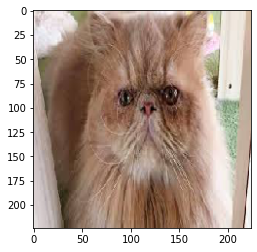

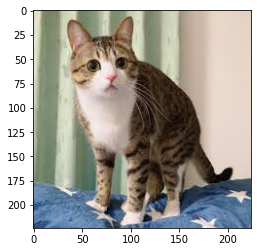

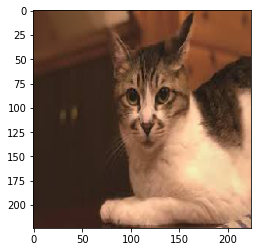

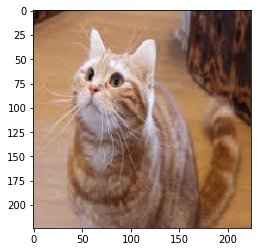

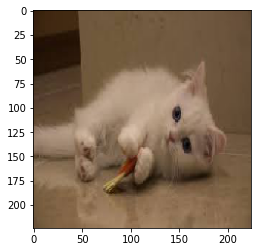

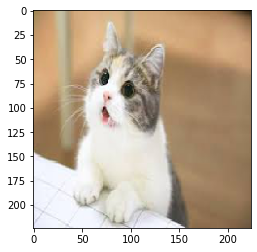

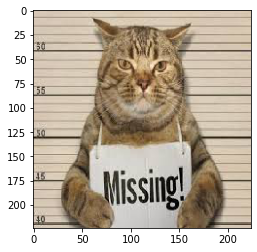

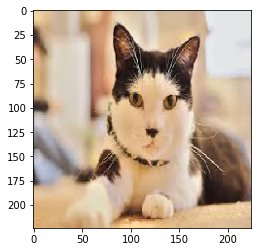

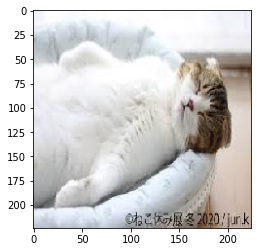

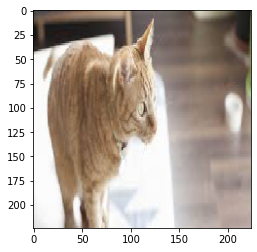

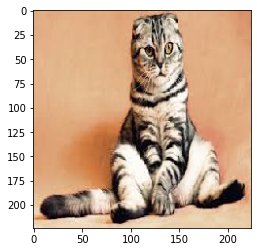

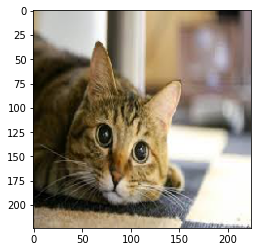

In [42]:
#入力画像サイズの指示
img_size = (224,224)
#画像フォルダ名の指示
dir_name = 'test'
#画像拡張子の指示
file_type  = 'jpg'

#フォルダ内のファイルパスをリスト化
img_list = glob.glob('/content/drive/My Drive/data_set/cat' + '/*' + ".jpeg")
#保存先の配列を確保
temp_img_array_list = []

#ファイルパスのリストをもとに画像を配列化
for img in img_list:
    #画像を224x224にリサイズしPIL形式で読込
    temp_img = load_img(img,grayscale=False,target_size=(img_size))
    #PIL形式からNumpy配列に変換と正規化(224, 224, 3)
    temp_img_array = img_to_array(temp_img) /255
    #変換したNumpy配列を末尾に追加
    temp_img_array_list.append(temp_img_array)
#Numpy配列をリスト化(*, 244, 224, 3)
test = np.array(temp_img_array_list)

for img in test:
  pil_img = Image.fromarray(np.uint8(img*255))
  fig = plt.figure()
  plt.imshow(pil_img)
plt.show()

test_label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [39]:
model = Sequential()
model.add(Conv2D(32, 3, 3, input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(224, 224,...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_6 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 186624)           

In [40]:
model.fit_generator(
        train_generator,
        steps_per_epoch = n_train_imgs*3,
        epochs=10,
        validation_data = validation_generator
        )

Epoch 1/10
72/72 [==============================] - 15s 213ms/step - loss: 1.2545 - accuracy: 0.5139 - val_loss: 0.8988 - val_accuracy: 0.5000
Epoch 2/10
72/72 [==============================] - 15s 204ms/step - loss: 0.6323 - accuracy: 0.5000 - val_loss: 0.6998 - val_accuracy: 0.6667
Epoch 3/10
72/72 [==============================] - 15s 203ms/step - loss: 0.6528 - accuracy: 0.6250 - val_loss: 0.3330 - val_accuracy: 0.5000
Epoch 4/10
72/72 [==============================] - 15s 203ms/step - loss: 0.6190 - accuracy: 0.5972 - val_loss: 0.6560 - val_accuracy: 0.6667
Epoch 5/10
72/72 [==============================] - 15s 204ms/step - loss: 0.6533 - accuracy: 0.6250 - val_loss: 0.6471 - val_accuracy: 0.6667
Epoch 6/10
72/72 [==============================] - 15s 206ms/step - loss: 1.0666 - accuracy: 0.6111 - val_loss: 0.6465 - val_accuracy: 0.6667
Epoch 7/10
72/72 [==============================] - 15s 204ms/step - loss: 0.6849 - accuracy: 0.6111 - val_loss: 0.7425 - val_accuracy: 0.6667

In [43]:
preds = model.predict(test).reshape(-1, )
print(preds)
# 二値分類
pred_list = np.round(preds).reshape(-1, )
pred_label_list = []
for pred in preds:
  if pred > 0.5:
    pred_label_list.append('cat')
  else:
    pred_label_list.append('dog')
print('pred', pred_list)
print('test', test_label)
#多クラス分類
# pred_list = np.argmax(preds, 1)

# keys = [k for preds in pred_list for k, v in label_dict.items() if v == pred_list[pred]]
# print(keys)


print(accuracy_score(test_label, pred_list))

[0.4533106  0.42376217 0.57159317 0.51376677 0.49668777 0.46255326
 0.3938887  0.46046406 0.4388588  0.4810539  0.25600854 0.4397688 ]
pred [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
test [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.8333333333333334


# 【問題3】物体検出データセットの用意

# 【問題4】物体検出データセットに対するデータ拡張

データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


In [79]:
cv2.imread('/content/drive/My Drive/Colab Notebooks/test/cat_1.jpg')

array([[[ 24,  23,  39],
        [ 16,  15,  31],
        [  7,   6,  22],
        ...,
        [  6,  12,  17],
        [  6,  12,  17],
        [  6,  12,  17]],

       [[ 24,  23,  39],
        [ 16,  15,  31],
        [  7,   6,  22],
        ...,
        [  6,  12,  17],
        [  6,  12,  17],
        [  6,  12,  17]],

       [[ 24,  23,  39],
        [ 16,  15,  31],
        [  7,   6,  22],
        ...,
        [  6,  12,  17],
        [  6,  12,  17],
        [  6,  12,  17]],

       ...,

       [[ 21,  42,  69],
        [ 21,  42,  69],
        [ 22,  43,  70],
        ...,
        [ 47,  69, 105],
        [ 47,  69, 105],
        [ 47,  69, 105]],

       [[ 19,  40,  67],
        [ 20,  41,  68],
        [ 22,  43,  70],
        ...,
        [ 47,  69, 105],
        [ 47,  69, 105],
        [ 47,  69, 105]],

       [[ 18,  39,  66],
        [ 20,  41,  68],
        [ 22,  43,  70],
        ...,
        [ 48,  70, 106],
        [ 47,  69, 105],
        [ 47,  69, 105]]

In [95]:
import cv2

annotation_dir = '/content/drive/My Drive/Colab Notebooks/anotation'
annotations = os.listdir(annotation_dir)
print(annotations)

os.chdir(annotation_dir)

def get_annotation_from_xml(xml_file):
  import xml.etree.ElementTree as ET
  xml_file = open(xml_file)
  tree = ET.parse(xml_file)
  root = tree.getroot()
  all_list = []

  img_file = root.find('filename').text  # 画像ファイル名を取得

  for obj in root.iter('object'):
      if obj.find('name').text == 'cat':
        cls = [0]
      else:
        cls = [1]
      xmlbox = obj.find('bndbox')
      b = [int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text)]
      all_list.append([img_file] + b + [cls])
      dic_1 = {'image':None, 'bboxes':None, 'category_id':None}
      dic_1['image'] = cv2.cvtColor(cv2.imread('/content/drive/My Drive/Colab Notebooks/test/'+img_file), cv2.COLOR_BGR2RGB)
      dic_1['bboxes'] = [b]
      dic_1['category_id'] = cls
  return dic_1

annotation_list = []
for annotation in annotations:
  annotation_list.append(get_annotation_from_xml(annotation))


annotation_list[0]



['cat_2.xml', 'cat_3.xml', 'cat_4.xml', 'dog_1.xml', 'dog_2.xml', 'dog_3.xml', 'dog_4.xml', 'cat_1.xml']


{'bboxes': [[77, 103, 400, 331]],
 'category_id': [0],
 'image': array([[[189, 181, 171],
         [189, 181, 171],
         [189, 181, 171],
         ...,
         [ 77,  65,  55],
         [ 77,  65,  55],
         [ 69,  55,  52]],
 
        [[189, 181, 171],
         [189, 181, 171],
         [189, 181, 171],
         ...,
         [ 77,  65,  55],
         [ 77,  65,  55],
         [ 77,  65,  55]],
 
        [[189, 181, 171],
         [181, 165, 154],
         [198, 181, 173],
         ...,
         [ 53,  49,  40],
         [ 57,  57,  57],
         [ 77,  65,  55]],
 
        ...,
 
        [[103, 116, 106],
         [106, 115, 122],
         [ 88, 100, 107],
         ...,
         [ 49,  49,  49],
         [ 41,  49,  50],
         [ 55,  57,  67]],
 
        [[103, 116, 106],
         [106, 115, 122],
         [ 88, 100, 107],
         ...,
         [ 57,  57,  57],
         [ 49,  57,  57],
         [ 49,  49,  58]],
 
        [[103, 116, 106],
         [ 84,  87, 100],
    

In [0]:
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    BboxParams,
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

In [0]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [0]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [0]:
# # Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
# annotations = {'image': image, 'bboxes': [[366.7, 80.84, 132.8, 181.84], [5.66, 138.95, 147.09, 164.88]], 'category_id': [18, 17]}
# category_id_to_name = {17: 'cat', 18: 'dog'}
category_id_to_name = {0: 'cat', 1: 'dog'}


In [96]:
for annotation in annotation_list:
  visualize(annotation, category_id_to_name)


Output hidden; open in https://colab.research.google.com to view.

In [97]:
cv2.__version__

'4.1.2'